In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels
import seaborn as sns 
import statsmodels.api as sm

df = pd.read_csv('sampled-books.csv')

In [37]:
#DESCRIPTIVE STATS CLEAN (APPENDIX A)
# Create an empty dictionary to store descriptive statistics
descriptive_stats = {}

# Calculate descriptive statistics for 'Number of Pages' column
descriptive_stats['Number of Pages'] = {
    'Count': df['num_pages'].count(),
    'Mean': df['num_pages'].mean(),
    'Median': df['num_pages'].median(),
    'Mode': df['num_pages'].mode()[0],
    'Standard Deviation': df['num_pages'].std(),
    'Range': df['num_pages'].max() -  df['num_pages'].min()
}

# Calculate descriptive statistics for 'Average Rating' column
descriptive_stats['Average Rating'] = {
    'Count': df['average_rating'].count(),
    'Mean': df['average_rating'].mean(),
    'Median': df['average_rating'].median(),
    'Mode': df['average_rating'].mode()[0],
    'Standard Deviation': df['average_rating'].std(),
    'Range': df['average_rating'].max() -  df['average_rating'].min()
}

# Create a DataFrame from the dictionary of descriptive statistics
df_stats = pd.DataFrame.from_dict(descriptive_stats, orient='index').transpose().round(2)

# Print the DataFrame containing descriptive statistics
print(df_stats)

# Print the highest number of pages in the dataset
print("The Highest number of pages is", df['num_pages'].max())


                    Number of Pages  Average Rating
Count                        200.00          200.00
Mean                         346.47            3.95
Median                       307.50            3.99
Mode                          96.00            4.07
Standard Deviation           234.55            0.29
Range                       1392.00            2.02
The Highest number of pages is 1392


In [38]:
#DESCRIPTIVE STATS CLEAN (APPENDIX B)
df = df[df['num_pages'] > 5]

descriptive_stats = {}
descriptive_stats['Number of Pages'] = {
    'Count': df['num_pages'].count(),
    'Mean': df['num_pages'].mean(),
    'Median': df['num_pages'].median(),
    'Mode': df['num_pages'].mode()[0],
    'Standard Deviation': df['num_pages'].std(),
    'Range': df['num_pages'].max() -  df['num_pages'].min()
}

descriptive_stats ['Average Rating']= {
    'Count': df['average_rating'].count(),
    'Mean': df['average_rating'].mean(),
    'Median': df['average_rating'].median(),
    'Mode': df['average_rating'].mode()[0],
    'Standard Deviation': df['average_rating'].std(),
    'Range': df['average_rating'].max() -  df['average_rating'].min()
}
descriptive_stats

df_stats = pd.DataFrame.from_dict(descriptive_stats, orient='index').transpose().round(2)
print(df_stats)

                    Number of Pages  Average Rating
Count                        198.00          198.00
Mean                         349.96            3.95
Median                       310.00            3.99
Mode                          96.00            4.07
Standard Deviation           233.12            0.29
Range                       1382.00            2.02


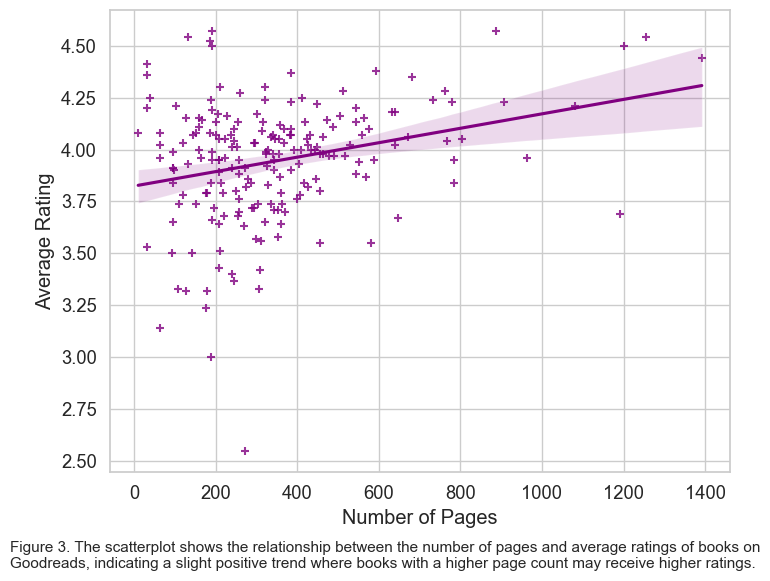

In [78]:
#LINEAR REGRESSION LINE (APPENDIX C)
# style settings
sns.set(color_codes=True, font_scale=1.2)
sns.set_style("whitegrid")
data = df
# Define a function for simple linear regression plot
def simple_linear_regression(column_x, column_y, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", color = 'purple')
# Set labels for the x-axis and y-axis
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.figtext(0.0, -0.05, 'Figure 3. The scatterplot shows the relationship between the number of pages and average ratings of books on\nGoodreads, indicating a slight positive trend where books with a higher page count may receive higher ratings.', 
                ha='left', fontsize=11)    
    plt.show()
    
simple_linear_regression("num_pages", "average_rating", "Number of Pages", "Average Rating")

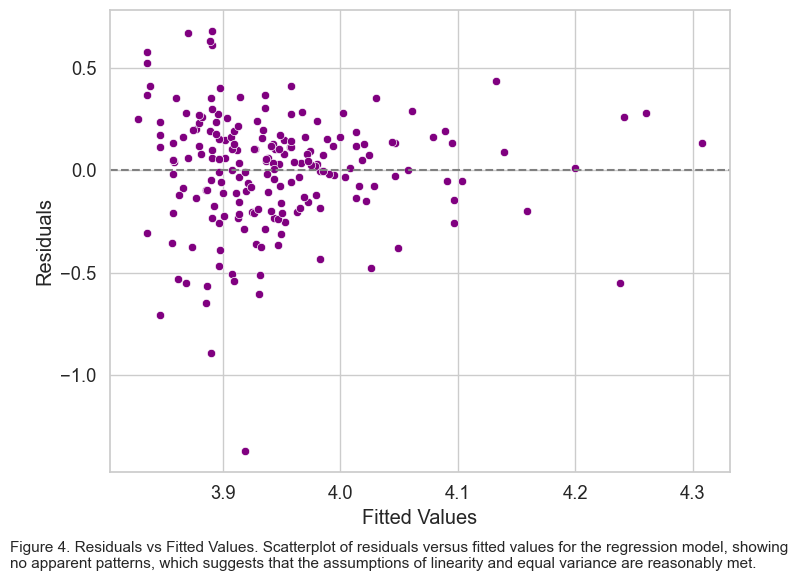

In [80]:
##RESIDUALS AND FITTED VALUES (APPENDIX D)
# style settings
sns.set(color_codes=True, font_scale=1.2)
sns.set_style("whitegrid")
data = df

def plot_residuals_vs_fitted(column_x, column_y):
    # fit the regression line using "statsmodels" library
    X = sm.add_constant(data[column_x])
    Y = data[column_y]
    regression_model = sm.OLS(Y, X).fit()
    
    # Extract fitted values and residuals
    fitted_values = regression_model.fittedvalues
    residuals = regression_model.resid
    
    # Create a plot of residuals vs fitted values
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=fitted_values, y=residuals, color = 'purple')
    plt.axhline(y=0, color='grey', linestyle='--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.figtext(0.0, -0.05, 'Figure 4. Residuals vs Fitted Values. Scatterplot of residuals versus fitted values for the regression model, showing\nno apparent patterns, which suggests that the assumptions of linearity and equal variance are reasonably met.', 
                ha='left', fontsize=11)
    plt.show()

plot_residuals_vs_fitted("num_pages", "average_rating")


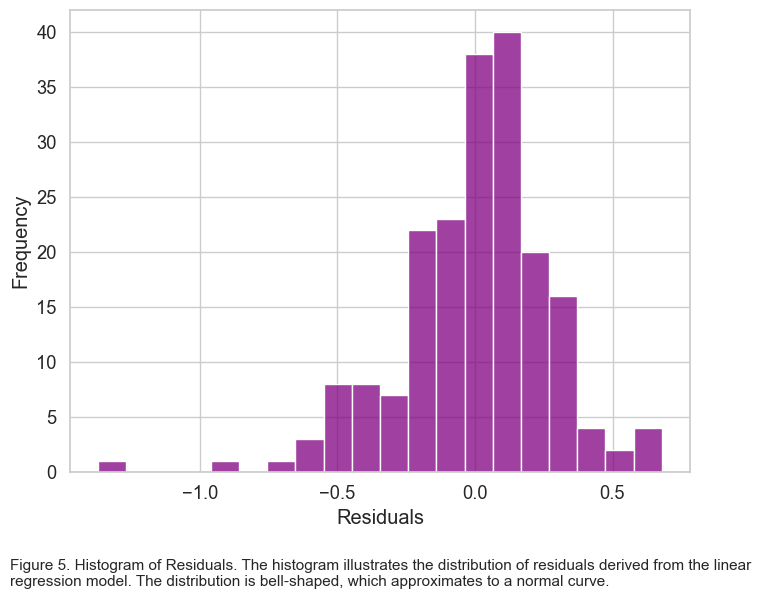

In [96]:
#RESIDUALS HISTOGRAM (APPENDIX E)
sns.set(color_codes=True, font_scale=1.2)
sns.set_style("whitegrid")
data = df 

def histogram_of_residuals(column_x, column_y):
    # fit the regression line using "statsmodels" library:
    X = sm.add_constant(data[column_x])
    Y = data[column_y]
    regression_model = sm.OLS(Y, X).fit()  # OLS = "ordinary least squares"
    
    # create a histogram of the residuals
    plt.figure(figsize=(8, 6))
    sns.histplot(regression_model.resid, kde=False, color='purple')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.figtext(0.05, -0.08, 'Figure 5. Histogram of Residuals. The histogram illustrates the distribution of residuals derived from the linear\nregression model. The distribution is bell-shaped, which approximates to a normal curve.', 
                ha='left', fontsize=11)
   
    plt.show()
histogram_of_residuals("num_pages", "average_rating")

In [16]:
#PEARSON'S R (APPENDIX F)
print("\nThe pearson's r value comparing the number of pages to the average rating is: ",round(df["num_pages"].corr(df["average_rating"]),3))


The pearson's r value comparing the number of pages to the average rating is:  0.279


In [19]:
#REGRESSION EQUATION (APPENDIX G)
def regression_model(column_x, column_y):
    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y, X).fit()  # OLS = "ordinary least squares"
    
    # extract regression parameters from model, rounded to 3 decimal places:
    slope = round(regressionmodel.params[1], 3)
    intercept = round(regressionmodel.params[0], 3)

    print("Regression equation: " + column_y + " = ", slope, " * " + column_x + " + ", intercept)

regression_model("num_pages", "average_rating")


Regression equation: average_rating =  0.0  * num_pages +  3.824


In [45]:
#SLOPE (APPENDIX H)

X = sm.add_constant(data['num_pages'])  # This adds a constant term to our predictor
Y = data['average_rating']

# Fit the OLS regression model
regression_model = sm.OLS(Y, X).fit()

# Get the slope (β1)
slope = regression_model.params['num_pages']

print(f"The slope of num_pages is: {slope}")

The slope of num_pages is: 0.0003471410165516764


In [20]:
#CONFIDENCE INTERVAL(APPENDIX I)
X = sm.add_constant(data['num_pages'])  # This adds the intercept term
Y = data['average_rating']

# Fit the OLS regression model
model = sm.OLS(Y, X).fit()

# Get the confidence interval for the slope
confidence_interval = model.conf_int(alpha=0.05).loc['num_pages']

print(f"95% confidence interval for the slope: {confidence_interval}")

95% confidence interval for the slope: 0    0.000179
1    0.000516
Name: num_pages, dtype: float64


In [21]:
#P-VALUE (APPENDIX J)
p_value = model.pvalues['num_pages']
print(f"p-value for the slope: {p_value}")

p-value for the slope: 6.968128572450136e-05


                    average_rating  num_pages  ratings_count  \
average_rating            1.000000   0.278800       0.094793   
num_pages                 0.278800   1.000000       0.028917   
ratings_count             0.094793   0.028917       1.000000   
text_reviews_count        0.063256   0.024841       0.931535   

                    text_reviews_count  
average_rating                0.063256  
num_pages                     0.024841  
ratings_count                 0.931535  
text_reviews_count            1.000000  


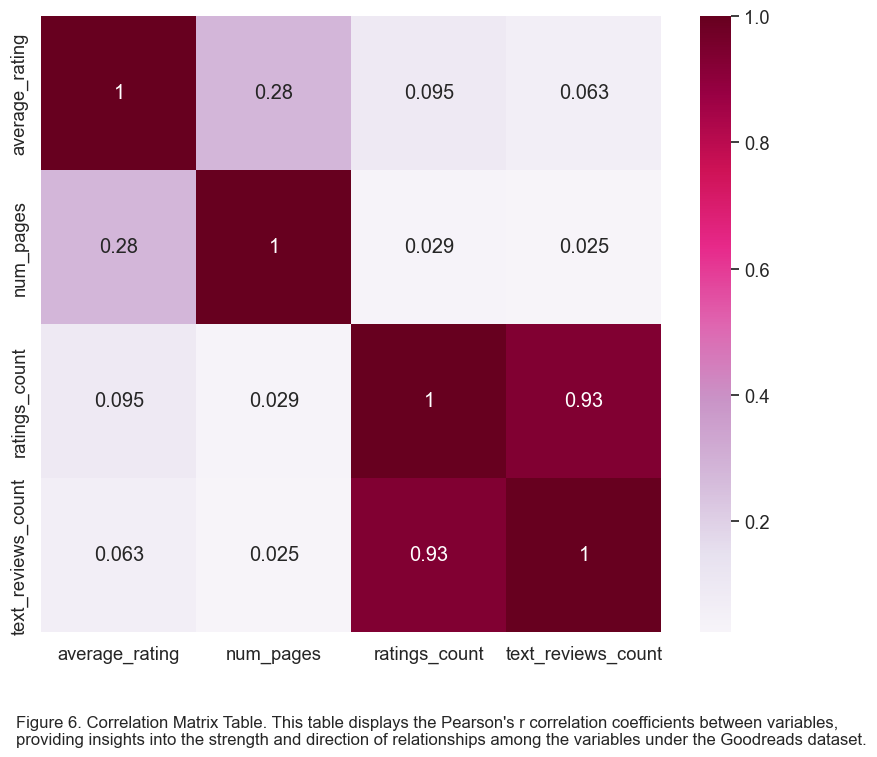

In [89]:
#CORRELATION MATRIX (APPENDIX K)
columns_to_include = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count'] 
selected_data = data[columns_to_include]

#use .corr() to create the matrix
correlation_matrix = selected_data.corr()
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd')
plt.figtext(0.1, -0.03, 'Figure 6. Correlation Matrix Table. This table displays the Pearson\'s r correlation coefficients between variables,\nproviding insights into the strength and direction of relationships among the variables under the Goodreads dataset.', 
    ha='left', fontsize=12)
plt.show()

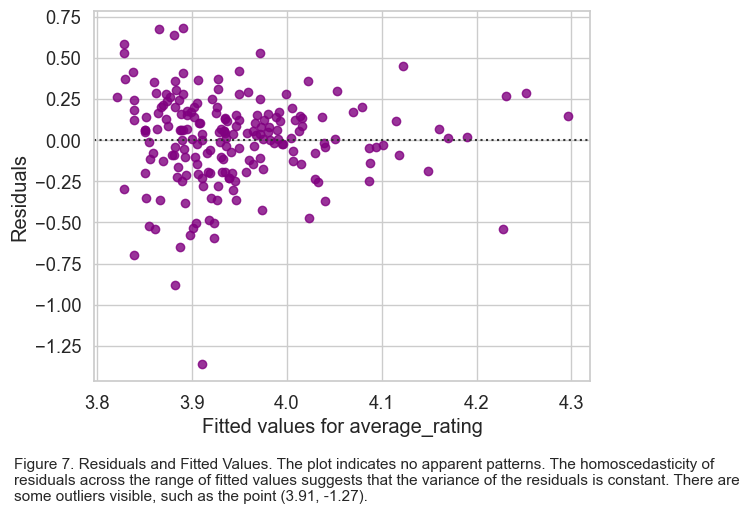

In [105]:
#LINE CONDITIONS- RESIDUALS VS FITTED VALUES (APPENDIX L)
def plot_residuals_vs_fitted(column_x, column_y, data):
    # Define predictors X and response Y
    X = data[column_x]
    X = sm.add_constant(X)
    Y = data[column_y]
    
    # Construct the regression model
    regression_model = sm.OLS(Y, X).fit()

    # Create a residual plot
    plt.figure()
    residuals = regression_model.resid
    fitted_values = regression_model.predict()
    sns.residplot(x=fitted_values, y=residuals, color='purple')
    plt.xlabel('Fitted values for ' + column_y)
    plt.ylabel('Residuals')
    plt.figtext(0.0, -0.14, 'Figure 7. Residuals and Fitted Values. The plot indicates no apparent patterns. The homoscedasticity of\nresiduals across the range of fitted values suggests that the variance of the residuals is constant. There are\nsome outliers visible, such as the point (3.91, -1.27).', 
                ha='left', fontsize=11)

plot_residuals_vs_fitted(['num_pages', 'ratings_count'], 'average_rating', data)


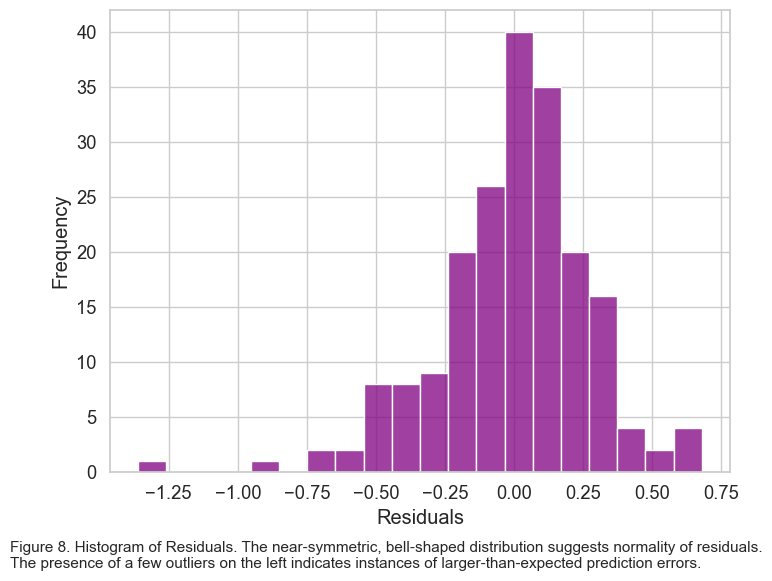

In [107]:
#LINE CONDITIONS- SLOPE VARIABLE ADDED (APPENDIX M)
sns.set(color_codes=True, font_scale=1.2)
sns.set_style("whitegrid")
data = df 

def histogram_of_residuals(column_x, column_y):
    # fit the regression line using "statsmodels" library:
    X = sm.add_constant(data[column_x])
    Y = data[column_y]
    regression_model = sm.OLS(Y, X).fit()  # OLS = "ordinary least squares"
    
    # create a histogram of the residuals
    plt.figure(figsize=(8, 6))
    sns.histplot(regression_model.resid, kde=False, color='purple')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.figtext(0.0, -0.05, 'Figure 8. Histogram of Residuals. The near-symmetric, bell-shaped distribution suggests normality of residuals.\nThe presence of a few outliers on the left indicates instances of larger-than-expected prediction errors.', 
                ha='left', fontsize=11)

    plt.show()
histogram_of_residuals(['num_pages', 'ratings_count'], 'average_rating')

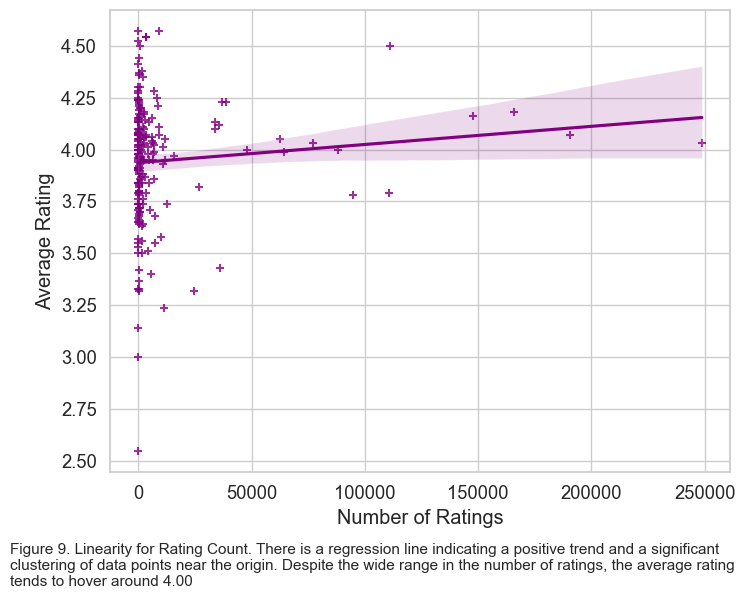

In [111]:
#LINE CONDITIONS- RESIDUALS HISTOGRAM (APPENDIX N)
# style settings
sns.set(color_codes=True, font_scale=1.2)
sns.set_style("whitegrid")
data = df

def simple_linear_regression(column_x, column_y, xlabel, ylabel):
    # Create a scatter plot with a linear regression line
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", color = 'purple')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.figtext(0.0, -0.08, 'Figure 9. Linearity for Rating Count. There is a regression line indicating a positive trend and a significant\nclustering of data points near the origin. Despite the wide range in the number of ratings, the average rating\ntends to hover around 4.00', 
                ha='left', fontsize=11)
    
    plt.show()
simple_linear_regression("ratings_count", "average_rating", "Number of Ratings", "Average Rating")

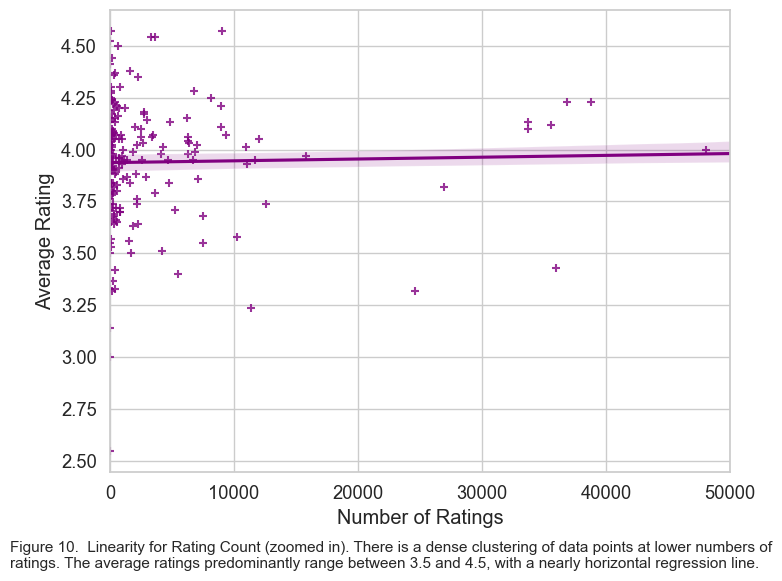

In [113]:
#LINE CONDITIONS- RESIDUALS HISTOGRAM ZOOMED IN(APPENDIX O)
# style settings
sns.set(color_codes=True, font_scale=1.2)
sns.set_style("whitegrid")
data = df

def simple_linear_regression(column_x, column_y, xlabel, ylabel):
    # Create a scatter plot with a linear regression line
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", color = 'purple')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(0, 50000)
    plt.figtext(0.0, -0.05, 'Figure 10.  Linearity for Rating Count (zoomed in). There is a dense clustering of data points at lower numbers of\nratings. The average ratings predominantly range between 3.5 and 4.5, with a nearly horizontal regression line.', 
                ha='left', fontsize=11)
    plt.show()
simple_linear_regression("ratings_count", "average_rating", "Number of Ratings", "Average Rating")

In [31]:
##EXACT VALUE OF THE SLOPE (APPENDIX P)
X = sm.add_constant(data[['num_pages', 'ratings_count']])  # Add a constant for the intercept
Y = data['average_rating']
model = sm.OLS(Y, X).fit()

# Get the full value of the slopes for each independent variable
slopes = model.params[1:]

# Print the full value of the slopes
for i, var in enumerate(X.columns[1:]):  # Skip the constant
    print(f"The full slope for {var} is: {slopes[i]}")

The full slope for num_pages is: 0.00034401565397759086
The full slope for ratings_count is: 7.993327075491406e-07


In [44]:
##R-SQUARED FOR MULTIPLE VARIABLES (APPENDIX Q)
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
r_squared = model.rsquared
print(f"The R-squared value of the model is: {r_squared}")

##########REGRESSION EQUATION###########
independent_vars = ['ratings_count', 'num_pages']
dependent_var = 'average_rating'

# Prepare the input data
X = data[independent_vars]
Y = data[dependent_var]
X = sm.add_constant(X)  # Add a constant to the model for the intercept

# Fit the OLS regression model
model = sm.OLS(Y, X).fit()

# Get the model's parameters
intercept, slopes = model.params[0], model.params[1:]

# Construct the regression equation as a string
regression_equation = f"{dependent_var} = {intercept:.4f}"
for slope, var in zip(slopes, independent_vars):
    regression_equation += f" + ({slope:.4f} * {var})"

# Print out the regression equation
print('\nregression equation: ', regression_equation)

######### Calculate the confidence intervals ########
confidence_intervals = model.conf_int()
print('\nconfidence interval: ', confidence_intervals)

#####Calculate the p-values######
p_values = model.pvalues
print('\np-values: ', p_values)

The R-squared value of the model is: 0.0852578082127683

regression equation:  average_rating = 3.8173 + (0.0000 * ratings_count) + (0.0003 * num_pages)

confidence interval:                            0         1
const          3.745719e+00  3.888784
ratings_count -4.450523e-07  0.000002
num_pages      1.757563e-04  0.000512

p-values:  const            9.348722e-174
ratings_count     2.067205e-01
num_pages         7.920498e-05
dtype: float64
